In [7]:
from util.kd import KnowledgeGraph
import json

In [9]:
LOG_CONFIG_FILE = "./config/k.json"

with open(LOG_CONFIG_FILE, "r", encoding="utf-8") as fp:
    c = json.load(fp)

kg = KnowledgeGraph(c)
kg.load_everything(
    index_view_path="./data/map.full.json",
    emb_model_path="model/2022-05-09 19-30-10.pth"
)

In [10]:
res = kg.predict_relation("Winter Olympics", "China")

for r in res:
    print(r)

{'start': 'China', 'start_type': 'place', 'relation': 'join', 'end': '2022 Winter Olympics', 'end_type': 'event', 'evidence': 'China->2022 Winter Olympics'}


In [11]:
import torch

torch.min(kg.rel_emb, axis=0)[0]

tensor([-0.1768, -0.1854, -0.1791, -0.1895, -0.1788, -0.1840, -0.1973, -0.1796,
        -0.1874, -0.1820, -0.1935, -0.1886, -0.1800, -0.1864, -0.1862, -0.1936,
        -0.1769, -0.1890, -0.1819, -0.1822, -0.1770, -0.1890, -0.1870, -0.1749,
        -0.1752, -0.1806, -0.1885, -0.1791, -0.1880, -0.1739, -0.1785, -0.1872,
        -0.1801, -0.1999, -0.1859, -0.1825, -0.1793, -0.1728, -0.1801, -0.1939,
        -0.1822, -0.1833, -0.1848, -0.1766, -0.1831, -0.1795, -0.1858, -0.1766,
        -0.1866, -0.1855, -0.1785, -0.1847, -0.1954, -0.2020, -0.1852, -0.1805,
        -0.1887, -0.1961, -0.1819, -0.2009, -0.1830, -0.1823, -0.1918, -0.1999,
        -0.1877, -0.1859, -0.1741, -0.1763, -0.1786, -0.1901, -0.1817, -0.1929,
        -0.1883, -0.1777, -0.1853, -0.1911, -0.1870, -0.1825, -0.1742, -0.1822,
        -0.1781, -0.1850, -0.1966, -0.1751, -0.1883, -0.1760, -0.1808, -0.1812,
        -0.1820, -0.1741, -0.1890, -0.1882, -0.1863, -0.1858, -0.1882, -0.1947,
        -0.1949, -0.1836, -0.1861, -0.18

In [12]:
torch.max(kg.rel_emb, axis=0)[0]

tensor([0.1788, 0.1823, 0.1753, 0.1867, 0.1790, 0.1824, 0.1853, 0.1855, 0.1785,
        0.1812, 0.1798, 0.2031, 0.1813, 0.1747, 0.1819, 0.1776, 0.1880, 0.1804,
        0.1776, 0.1817, 0.1861, 0.1795, 0.1797, 0.1781, 0.1792, 0.1822, 0.1861,
        0.1782, 0.1772, 0.1907, 0.1878, 0.1790, 0.1871, 0.1841, 0.1846, 0.1821,
        0.1793, 0.1868, 0.1869, 0.1802, 0.1896, 0.1985, 0.1840, 0.1902, 0.1766,
        0.1797, 0.1802, 0.1889, 0.1847, 0.1799, 0.1858, 0.1763, 0.1842, 0.1748,
        0.1726, 0.1832, 0.1837, 0.1903, 0.1972, 0.1832, 0.1947, 0.1846, 0.1742,
        0.1740, 0.1996, 0.1920, 0.1897, 0.1755, 0.1720, 0.1815, 0.1953, 0.1853,
        0.1787, 0.1938, 0.1915, 0.1807, 0.1901, 0.1896, 0.1750, 0.1890, 0.1791,
        0.1940, 0.1770, 0.1729, 0.1848, 0.1923, 0.1834, 0.1781, 0.1884, 0.1983,
        0.1969, 0.1920, 0.1827, 0.1877, 0.1892, 0.1865, 0.1903, 0.1948, 0.1956,
        0.1768, 0.1916, 0.1796, 0.1884, 0.1827, 0.1828, 0.1799, 0.1718, 0.1726,
        0.1798, 0.1783, 0.1910, 0.1807, 

In [15]:
vec_len = [torch.sqrt(torch.norm(kg.rel_emb[i])).item() for i in range(kg.rel_emb.shape[0])]

In [20]:
import numpy as np
vec_len = np.array(vec_len)
indice = np.arange(500)
np.random.shuffle(indice)

vec_len = np.array([kg.rel_emb[i].tolist() for i in indice])

In [30]:
res = np.cov(vec_len.T)
res

array([[ 8.12819249e-04,  9.57185895e-05,  9.25832774e-05, ...,
         4.37339808e-05,  2.67218205e-05,  1.04374167e-04],
       [ 9.57185895e-05,  9.65358810e-04, -2.31275865e-05, ...,
        -4.68607207e-05,  2.12733316e-05,  2.74929805e-05],
       [ 9.25832774e-05, -2.31275865e-05,  8.74166636e-04, ...,
         6.65456834e-05, -5.09419359e-05, -3.76850490e-05],
       ...,
       [ 4.37339808e-05, -4.68607207e-05,  6.65456834e-05, ...,
         9.57091336e-04,  4.85210214e-05, -3.11877779e-05],
       [ 2.67218205e-05,  2.12733316e-05, -5.09419359e-05, ...,
         4.85210214e-05,  9.78613772e-04,  4.97194473e-05],
       [ 1.04374167e-04,  2.74929805e-05, -3.76850490e-05, ...,
        -3.11877779e-05,  4.97194473e-05,  1.04637467e-03]])

In [31]:
vals, vecs = np.linalg.eig(res)

In [38]:
target = np.diag(vals ** (-0.5))
target

array([[16.07466711,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 16.91137153,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 17.49590978, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., 54.78720278,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        51.03652899,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , 47.73034172]])

In [35]:
vecs

array([[ 0.05204221, -0.12963684, -0.02999723, ...,  0.06018427,
         0.02361324, -0.00626761],
       [ 0.17080907, -0.10183488, -0.05999234, ..., -0.07227207,
        -0.04221971,  0.09885366],
       [-0.095143  ,  0.01401355, -0.0294788 , ..., -0.09363791,
        -0.0272232 ,  0.1229505 ],
       ...,
       [-0.03237525,  0.0770696 , -0.04644924, ..., -0.15423225,
        -0.08420493, -0.00351221],
       [-0.01826545,  0.01072659, -0.07983858, ...,  0.1188083 ,
        -0.00704384, -0.01778924],
       [ 0.20559153, -0.11821214,  0.02743676, ..., -0.07630456,
         0.07598397,  0.01511405]])

In [54]:
vec = (vecs @ target @ vecs.T @ vec_len.T).T 
vec.shape

(500, 128)

In [55]:
vec_ll = np.array([np.sqrt(np.linalg.norm(vec[i])) for i in range(vec.shape[0])])

In [56]:
vec_ll.mean(), vec_ll.std()

(3.246793252436298, 0.4990203055663107)

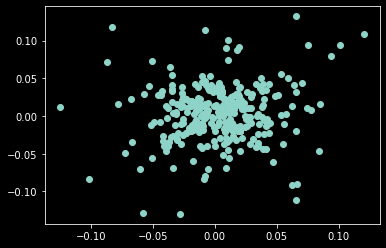

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

indices = np.arange(500)
np.random.shuffle(indice)

sample_x = np.array([kg.rel_emb[i][0].item() for i in indice])
sample_y = np.array([kg.rel_emb[i][1].item() for i in indice])

plt.scatter(sample_x, sample_y)
plt.show()

In [68]:
kg_rel_emb = kg.rel_emb
kg_rel_emb = (kg_rel_emb - kg_rel_emb.mean(axis=0)) / (kg_rel_emb.std(axis=0) * kg_rel_emb.std(axis=0))
kg_rel_emb_lens = np.array([np.sqrt(np.linalg.norm(kg_rel_emb[i])) for i in indice])

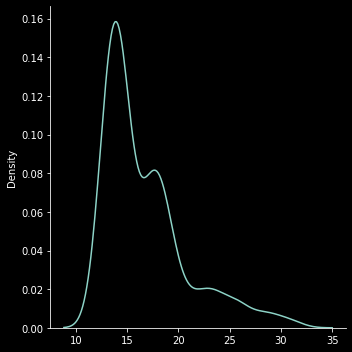

In [69]:
sns.displot(kg_rel_emb_lens, kind="kde")